In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data1=pd.read_csv("/Users/DELL/Desktop/salesdata.csv", engine='python')

In [3]:
data1

,transaction_id,product_id,product_description,quantity_sold,transaction_timestamp,unit_price,customer_id,transaction_country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
data1['product_description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
ASSORTED COLOUR BIRD ORNAMENT          1501
SET OF 3 CAKE TINS PANTRY DESIGN       1473
PACK OF 72 RETROSPOT CAKE CASES        1385
LUNCH BAG  BLACK SKULL.                1350
NATURAL SLATE HEART CHALKBOARD         1280
POSTAGE                                1252
JUMBO BAG PINK POLKADOT                1251
HEART OF WICKER SMALL                  1237
JAM MAKING SET WITH JARS               1229
JUMBO STORAGE BAG SUKI                 1214
PAPER CHAIN KIT 50'S CHRISTMAS         1210
JUMBO SHOPPER VINTAGE RED PAISLEY      1202
LUNCH BAG CARS BLUE                    1197
LUNCH BAG SPACEBOY DESIGN              1192
JAM MAKING SET PRINTED                 1182
RECIPE BOX PANTRY YELLOW DESIGN        1180
SPOTTY BUNTING                         1172
LUNCH BAG SUKI DESIGN           

In [5]:
data1.dtypes


transaction_id            object
product_id                object
product_description       object
quantity_sold              int64
transaction_timestamp     object
unit_price               float64
customer_id              float64
transaction_country       object
dtype: object

In [6]:
data1[['product_description']].sample(2,random_state=42)

,product_description
209268,HANGING JAM JAR T-LIGHT HOLDER
207108,GOLD FISHING GNOME


In [7]:
len(data1)

541909

In [8]:
data1[['product_description','quantity_sold','product_id']].describe(include=np.object).transpose

<bound method DataFrame.transpose of                        product_description product_id
count                               540455     541909
unique                                4223       4070
top     WHITE HANGING HEART T-LIGHT HOLDER     85123A
freq                                  2369       2313>

In [9]:
data1['product_description'].nunique()

4223

In [10]:
cat_df=data1.groupby('product_description').agg({'quantity_sold':pd.Series.count}).rename(columns={'quantity_sold':'demand'}).sort_values('demand',ascending=False)

In [11]:
lf=cat_df.head(50)

In [12]:
df=cat_df.head(500)

In [13]:
from IPython.display import HTML
import base64

def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df)


In [14]:
lf

,demand
product_description,
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638
ASSORTED COLOUR BIRD ORNAMENT,1501
SET OF 3 CAKE TINS PANTRY DESIGN,1473
PACK OF 72 RETROSPOT CAKE CASES,1385
LUNCH BAG BLACK SKULL.,1350


In [15]:
cat_df.describe()

,demand
count,4223.000000
mean,127.978925
std,195.034410
min,1.000000
25%,11.000000
50%,57.000000
75%,161.000000
max,2369.000000


Text(0,0.5,'Quantity sold for top 50 products')

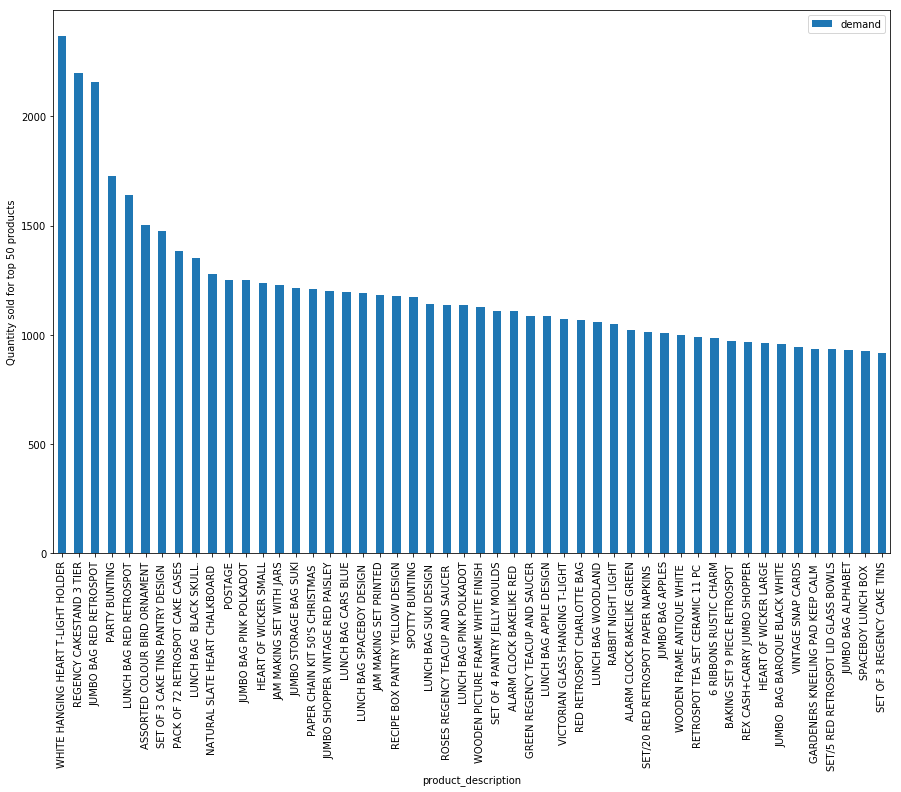

In [16]:
lf[['demand']].plot(kind='bar',figsize=(15,10))
plt.ylabel('Quantity sold for top 50 products')


In [17]:
tt_df=data1.groupby('transaction_country').agg({'quantity_sold':pd.Series.count,'transaction_id':pd.Series.nunique}).rename(columns={'quantity_sold':'demand','transaction_country':'country','transaction_id':'Number of Customer'}).sort_values('demand',ascending=False)

In [18]:
tt_df

,demand,Number of Customer
transaction_country,,
United Kingdom,495478,23494
Germany,9495,603
France,8557,461
EIRE,8196,360
Spain,2533,105
Netherlands,2371,101
Belgium,2069,119
Switzerland,2002,74
Portugal,1519,71


In [19]:
tt_df['Average_transaction/per_Id'] = tt_df['demand']/tt_df['Number of Customer']

In [20]:
tt_df['Average_transaction/per_Id']

transaction_country
United Kingdom          21.089555
Germany                 15.746269
France                  18.561822
EIRE                    22.766667
Spain                   24.123810
Netherlands             23.475248
Belgium                 17.386555
Switzerland             27.054054
Portugal                21.394366
Australia               18.246377
Norway                  27.150000
Italy                   14.600000
Channel Islands         22.969697
Finland                 14.479167
Cyprus                  31.100000
Sweden                  10.043478
Unspecified             34.307692
Austria                 21.105263
Denmark                 18.523810
Japan                   12.785714
Poland                  14.208333
Israel                  33.000000
USA                     41.571429
Hong Kong               19.200000
Singapore               22.900000
Iceland                 26.000000
Canada                  25.166667
Greece                  24.333333
Malta                   12.7

In [21]:
tt_df


,demand,Number of Customer,Average_transaction/per_Id
transaction_country,,,
United Kingdom,495478,23494,21.089555
Germany,9495,603,15.746269
France,8557,461,18.561822
EIRE,8196,360,22.766667
Spain,2533,105,24.123810
Netherlands,2371,101,23.475248
Belgium,2069,119,17.386555
Switzerland,2002,74,27.054054
Portugal,1519,71,21.394366


<Figure size 1080x720 with 0 Axes>

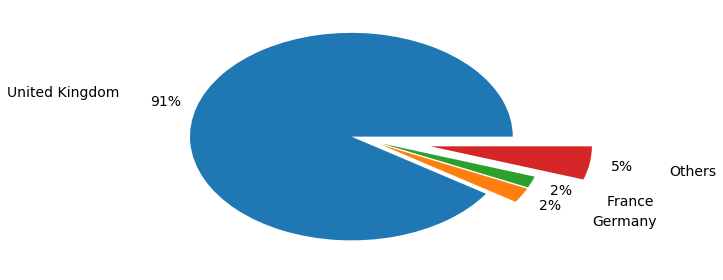

<Figure size 432x288 with 0 Axes>

In [25]:
fig = plt.figure(1,figsize=(15,10))
explode = (0.1, 0.1, 0.1, 0.4)
fig, ax = plt.subplots()
sizes=[23494,603,461,1342]
labels=['United Kingdom','Germany','France','Others']
plt.pie(sizes, labels=labels,explode=explode, autopct='%1.0f%%', pctdistance=1.2, labeldistance=1.5,textprops={'fontsize': 14})
  
plt.tight_layout()
plt.show()
plt.savefig('Countrywisesales.jpeg')

In [26]:
activity=data1['transaction_country']

Text(0,0.5,'Average_transaction/per_Id')

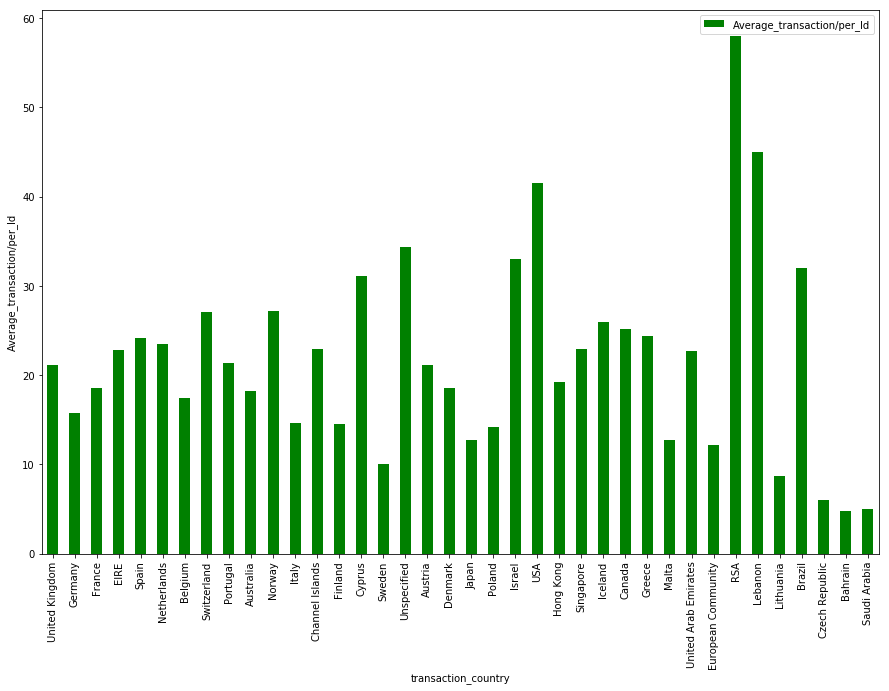

In [27]:
tt_df[['Average_transaction/per_Id']].plot(kind='bar',figsize=(15,10),color='green')
plt.ylabel('Average_transaction/per_Id')